In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.animation as animation

In [4]:
f = plt.imread('/content/drive/Shareddrives/Imagenes/TP2 Grupo 2/Ejercicio 2/barbara.gif');
print(f.shape)
f = cv.cvtColor(f, cv.COLOR_BGRA2GRAY)
print(f.shape)

(580, 720, 4)
(580, 720)


Utilizamos dos matrices que definen las transformaciones afines a aplicar.
Estas transformacione realizar un mapeo desde 

In [ ]:
ysize, xsize = f.shape;
print(ysize, xsize)
images_f3 = []
images_Fd = []
for xshrink in range(0, 600, 5):
  desiredxsize = xsize - xshrink;
  scale_shrink = desiredxsize / xsize;

  T_mat = np.array([[scale_shrink, 0, 0], [0, scale_shrink, 0], [0, 0 ,1]], dtype=np.float32)
  print(T_mat.shape)
  f2 = cv.warpPerspective(f, T_mat, (desiredxsize, desiredxsize))
  currentysize, currentxsize = f2.shape;

  scale_boost = xsize / currentxsize;
  T_mat_inv = np.array([[scale_boost, 0, 0], [0, scale_boost, 0], [0, 0 ,1]], dtype=np.float32)
  
  f3 = cv.warpPerspective(f2, T_mat_inv, (xsize, ysize))
  Fd = np.fft.fftshift(np.log(1+abs(np.fft.fft2(f3))));
  images_f3.append(f3)
  images_Fd.append(Fd)

Al achicar la imagen, estamos haciendo sub-muestreando la imagen sin utilizar ningún filtro antialiaisng. Esto provoca que aparezca el aliasing. Luego se la devuelve a su tamaño original utilizando la transformación afin e interpolación bilineal (docs de opencv)
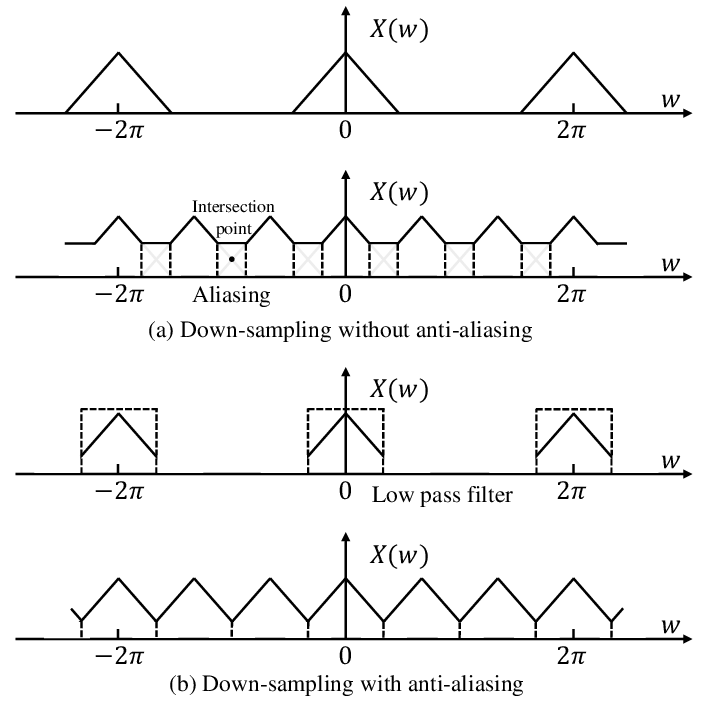

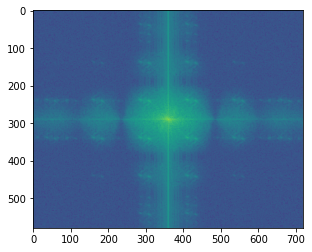

In [29]:
fig = plt.figure()
ims = []
for i in images_Fd:
    im = plt.imshow(i, animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('dynamic_images.mp4')

Vemos el aliasing

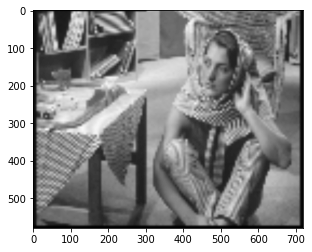

In [31]:
fig = plt.figure()
ims = []
for i in images_f3:
    im = plt.imshow(i, animated=True, cmap='gray')
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('aliasing_evo.mp4')

Adjuntos estan los videos que muestran como se va incrementando el aliasing conforme aumenta el submuestreo. Tambien esta la evolución del espectro